![New York City schoolbus](schoolbus.jpg)

Photo by [Jannis Lucas](https://unsplash.com/@jannis_lucas) on [Unsplash](https://unsplash.com).
<br>

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

Dataset 'schools.csv' contains useful information about New York City's (NYC) public school SAT performance.

### Key Findings

Here are some key findings discovered while exploring this dataset:
- There is a big correlation between the top 10 schools for average math score and averate total score in the SAT exams.
- Students overall do better at math than in other subjects in most NYC schools.
- On average, the bourough of Staten Island has the highest scores, while the Bronx has the lowest ones. The comparison however may be skewed by the number of schools, so a better comparison would be between the Bronx and Queens.
- The largest deviation in scores happens in Manhattan, so further analysis of Manhattan schools may be needed to see the cause of this.

### Data Description

The following list gives a description of our key variables:
- "school_name" - The name of the school where the record comes from.
- "borough" - Name of the borough where the school is.
- "building_code" - Particular code for the school building.
- "average_math" - Average math score at that school.
- "average_reading" - Average reading score at that school.
- "average_writing" - Average writing score at that school.
- "percent_tested" - Percentage of testable students tested at that particular school.
- "total_SAT" - this column is added and is just the sum of the three average scores.

In [210]:
# Re-run this cell 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
# Read in the data
schools = pd.read_csv("schools.csv")
schools['total_SAT'] = schools['average_math']\
                        +schools['average_reading']\
                        +schools['average_writing']

Here we declare any functions that may be used during the analysis.

In [174]:
# This function adds a line break if the name of a school is too long
def name_splitter(name):
    list_name = name.split(' ')
    # We consider that over 30 characters is too long
    new_name = list_name.pop(0)
    while (len(new_name)<30 and len(list_name)>0):
        new_name = new_name +' ' +list_name.pop(0)
    if len(list_name)>0:
        new_name = new_name +'\n'
        while len(list_name)>0:
            new_name = new_name +' ' +list_name.pop(0)
    return new_name

Below it can be observed that there are 20 missing values in the "percent_tested" column. This is not an issue for most analysis that will be done.

In [2]:
schools.info() # checking data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school_name      375 non-null    object 
 1   borough          375 non-null    object 
 2   building_code    375 non-null    object 
 3   average_math     375 non-null    int64  
 4   average_reading  375 non-null    int64  
 5   average_writing  375 non-null    int64  
 6   percent_tested   355 non-null    float64
 7   total_SAT        375 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 23.6+ KB


Basic statistical values about numerical variables.

In [3]:
schools.describe()

,average_math,average_reading,average_writing,percent_tested,total_SAT
count,375.000000,375.000000,375.000000,355.000000,375.000000
mean,432.944000,424.504000,418.458667,64.976338,1275.906667
std,71.952373,61.881069,64.548599,18.747634,194.906283
min,317.000000,302.000000,284.000000,18.500000,924.000000
25%,386.000000,386.000000,382.000000,50.950000,1157.000000
50%,415.000000,413.000000,403.000000,64.800000,1226.000000
75%,458.500000,445.000000,437.500000,79.600000,1330.500000
max,754.000000,697.000000,693.000000,100.000000,2144.000000


Checking the schools for math scores greater than 80% of 800 and sorting by average math score in descending order.

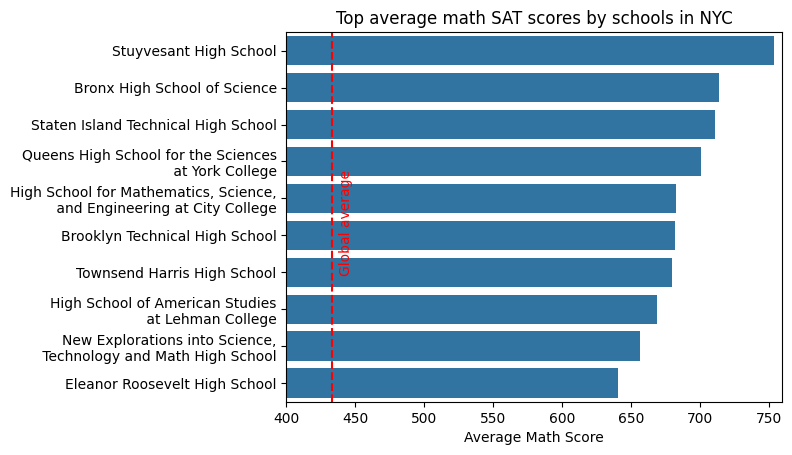

In [175]:
best_math_schools = schools\
                    .query('average_math>=640')\
                    .sort_values(by='average_math',ascending=False)

best_math_schools['school_name'] = best_math_schools['school_name']\
                                    .apply(name_splitter)

fig,ax = plt.subplots()
sns.barplot(data=best_math_schools,y='school_name',x='average_math',ax=ax)

ax.set_ylabel('')
ax.set_xlabel('Average Math Score')
ax.set_title('Top average math SAT scores by schools in NYC')
ax.set_xlim(400,760)
ax.axvline(x=schools['average_math'].mean(),label='Overall average',color='r',linestyle='--')
plt.text(schools['average_math'].mean()+5,6,'Global average',rotation=90,color='r')
plt.show()

Plotting to see how the top 30 schools do in each subject, as well as overall.

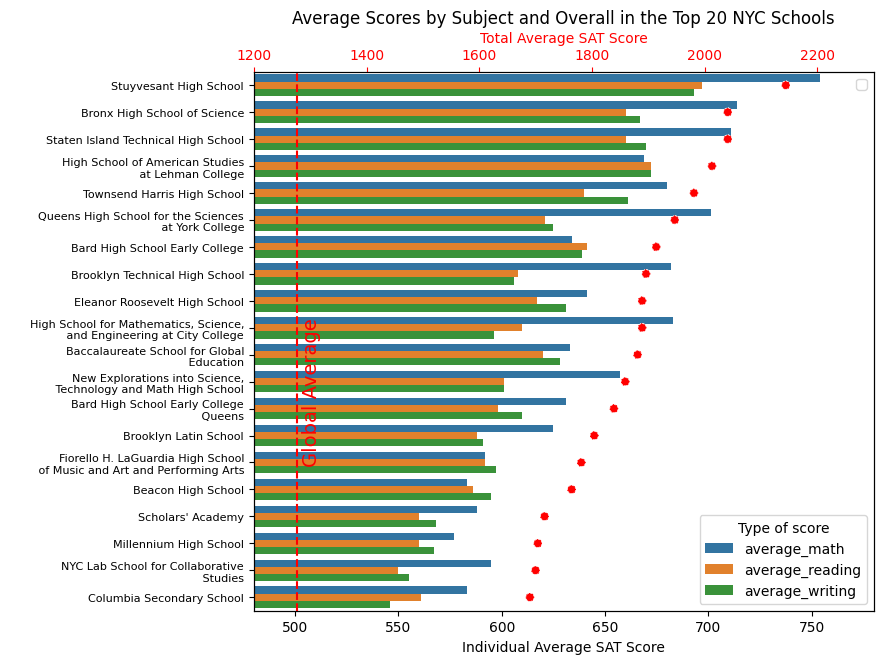

In [186]:
top_10_schools = schools[['school_name','total_SAT']].sort_values(by='total_SAT',ascending=False)[0:10]
top_20_schools = schools.sort_values(by='total_SAT',ascending=False)[0:20]
top_20_schools['school_name'] = top_20_schools['school_name']\
                                    .apply(name_splitter)

melted_top_20 = top_20_schools.melt(id_vars=['school_name','borough','building_code','percent_tested','total_SAT'],\
                            var_name='Type of score',value_name='Score')

fig,ax = plt.subplots(figsize=(8,7))

ax2 = ax.twiny()
ax2.tick_params(axis='x',colors='r')
ax2.set_xlabel('Total Average SAT Score',color='r',fontsize=10)
ax2.axvline(x=schools['total_SAT'].mean(),color='r',linestyle='--')
plt.text(schools['total_SAT'].mean()+10,14,'Global Average',fontsize=14,rotation=90,color='r')
ax2.set_xlim(1200,2300)

ax.set_ylabel(' ')
ax.set_yticklabels(melted_top_20['school_name'],fontsize=8)
ax.set_xlabel('Individual Average SAT Score',fontsize=10)
ax.set_xlim(480,780)
ax.set_title('Average Scores by Subject and Overall in the Top 20 NYC Schools',fontsize=12)

sns.scatterplot(data=melted_top_20,y='school_name',x='total_SAT',\
            linestyle='--',color='r',ax=ax2)
sns.barplot(data=melted_top_20,y='school_name',x='Score',hue='Type of score',ax=ax,width=0.8)

plt.legend()
plt.show()

Checking how many of the top performing schools in math are also in the top 10 schools.

In [7]:
correlation_mask = best_math_schools['school_name'].isin(top_10_schools['school_name'])
print(list(correlation_mask))
display(best_math_schools[correlation_mask])

[True, True, True, True, False, True, True, True, False, True]


,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested,total_SAT
88,Stuyvesant High School,Manhattan,M477,754,697,693,97.4,2144
170,Bronx High School of Science,Bronx,X445,714,660,667,97.0,2041
93,Staten Island Technical High School,Staten Island,R440,711,660,670,99.7,2041
365,Queens High School for the Sciences at York Co...,Queens,Q774,701,621,625,97.9,1947
280,Brooklyn Technical High School,Brooklyn,K430,682,608,606,95.5,1896
333,Townsend Harris High School,Queens,Q515,680,640,661,97.1,1981
174,High School of American Studies at Lehman College,Bronx,X905,669,672,672,91.8,2013
45,Eleanor Roosevelt High School,Manhattan,M855,641,617,631,86.0,1889


Checking for the largest standard deviations in "total_SAT" based on boroughs and showing each borough in a bar plot.

,borough,num_schools,average_SAT,std_SAT,iqr_SAT
0,Bronx,98,1202.724490,150.393901,114.0
1,Brooklyn,109,1230.256881,154.868427,157.0
2,Manhattan,89,1340.134831,230.294140,242.0
3,Queens,69,1345.478261,195.252899,211.0
4,Staten Island,10,1439.000000,222.303596,94.5


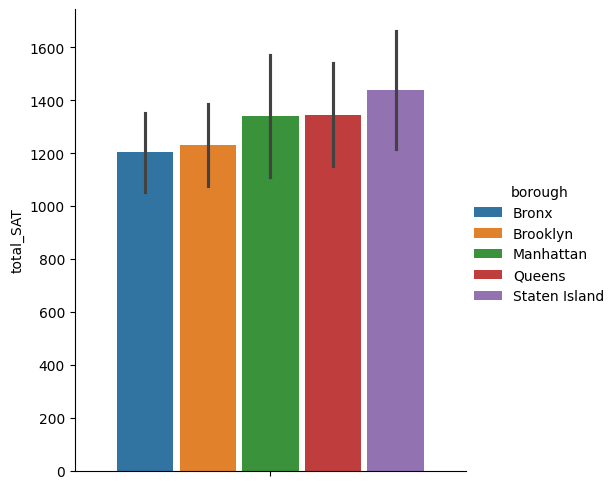

In [218]:
boroughs_std_dev = schools.groupby(by='borough',as_index=False)\
                    .agg(num_schools = ('borough',len),\
                         average_SAT = ('total_SAT',np.mean),
                         std_SAT = ('total_SAT',np.std),
                         iqr_SAT = ('total_SAT',stats.iqr))

#largest_std_dev = round(boroughs_std_dev.loc[[boroughs_std_dev['std_SAT'].idxmax()]], 2)
sns.catplot(data=schools,y='total_SAT',kind='bar',hue='borough',errorbar='sd',gap=0.1,\
            hue_order=boroughs_std_dev['borough'])
display(boroughs_std_dev)
#display(largest_std_dev)